In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

#Read the dataset

In [30]:
data = pd.read_csv("/content/sample_data/heart.csv")

In [31]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
data.value_counts('target')

target
1    165
0    138
dtype: int64

In [35]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
X, y = data.drop(columns='target'), data['target']

#Data Visualizations

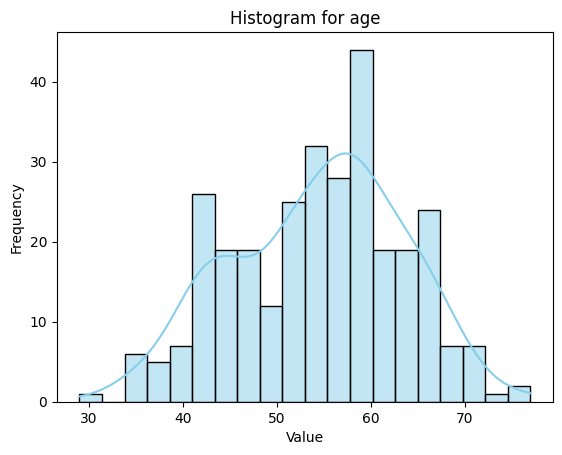

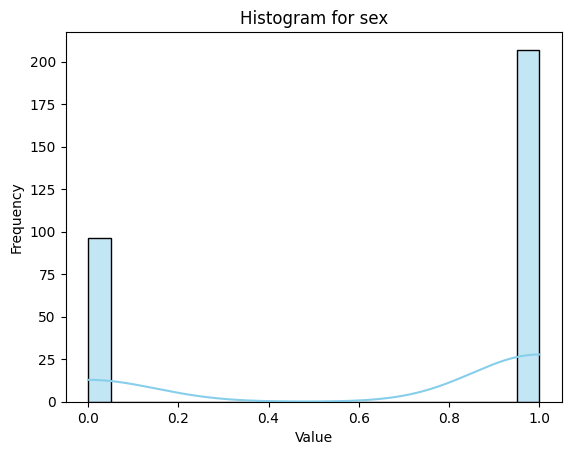

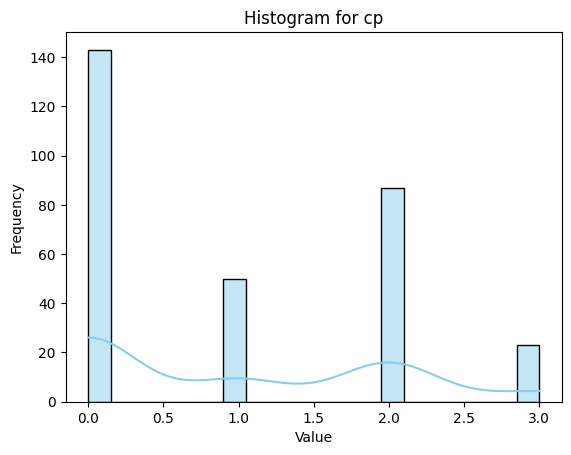

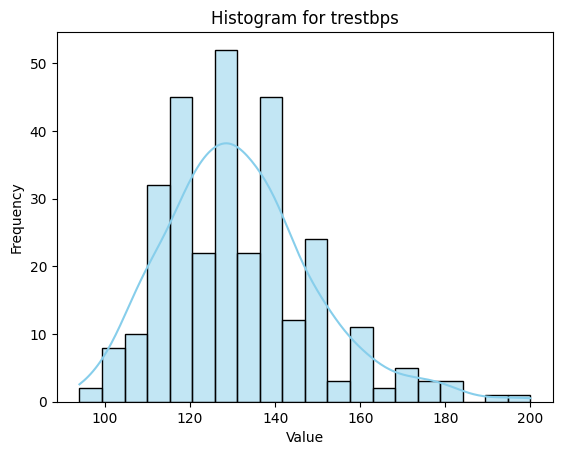

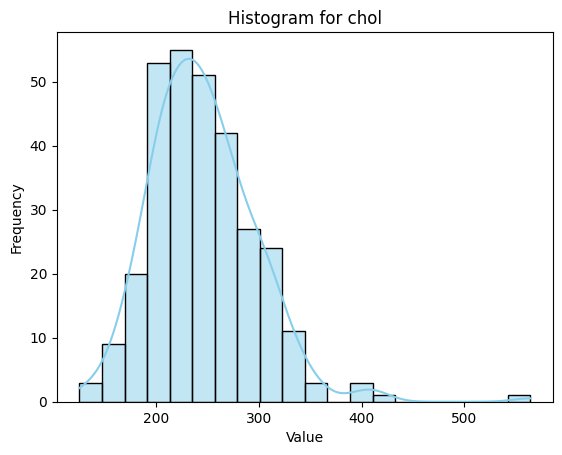

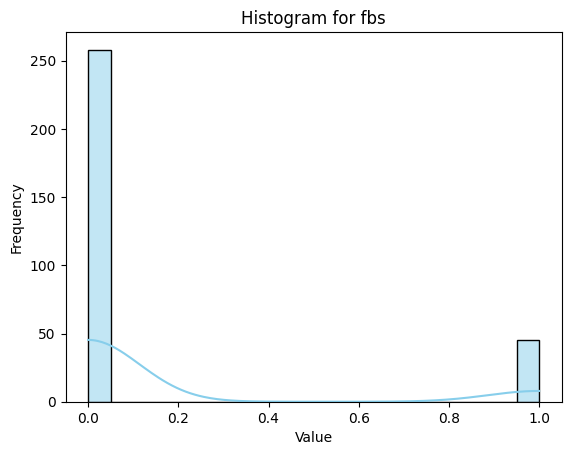

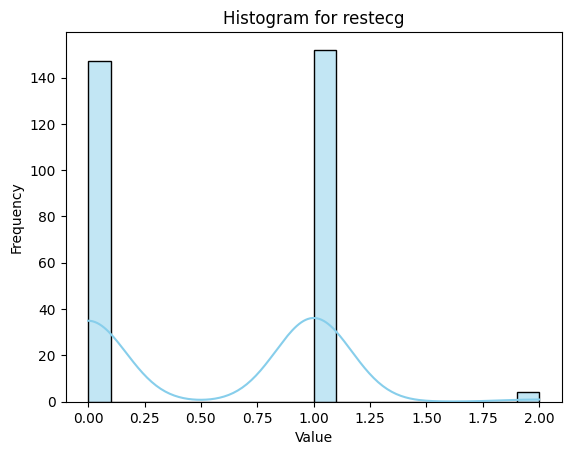

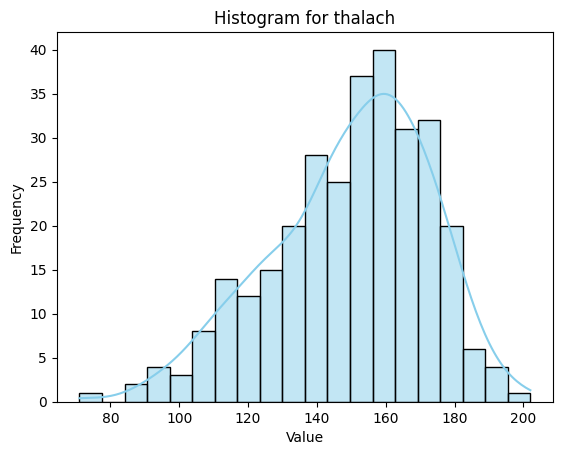

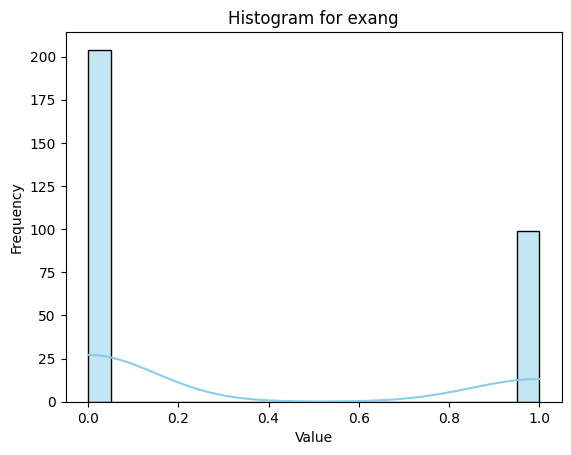

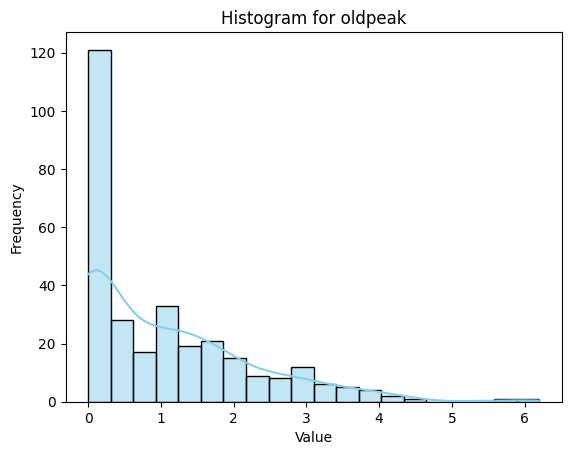

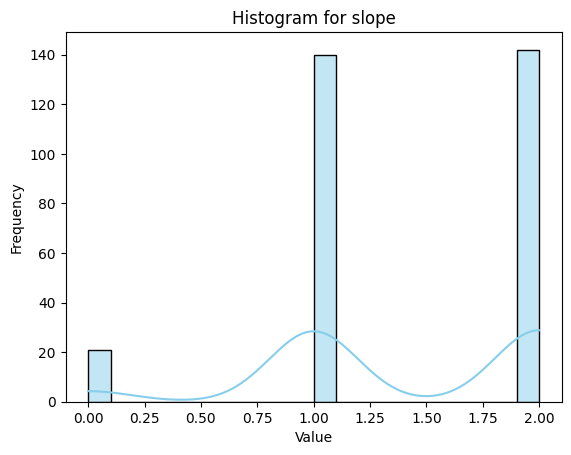

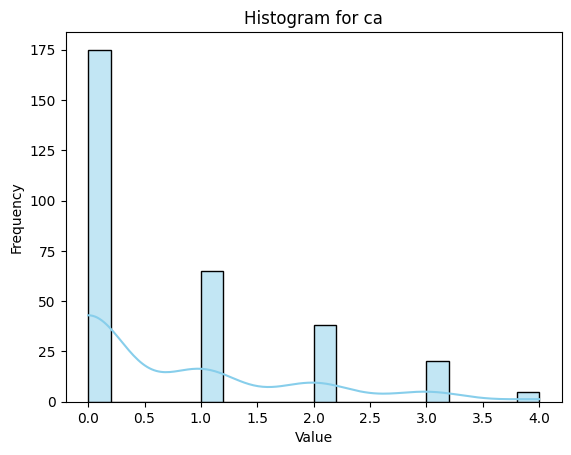

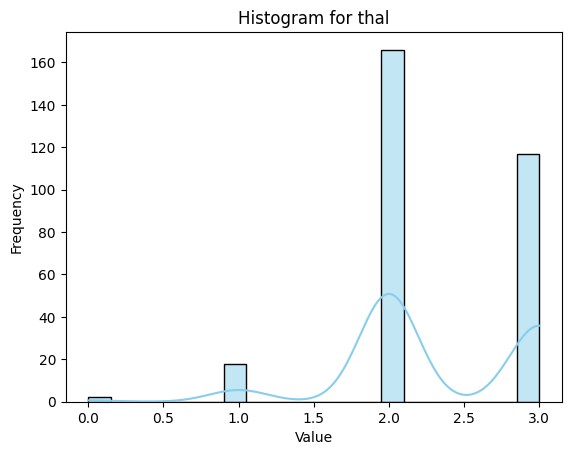

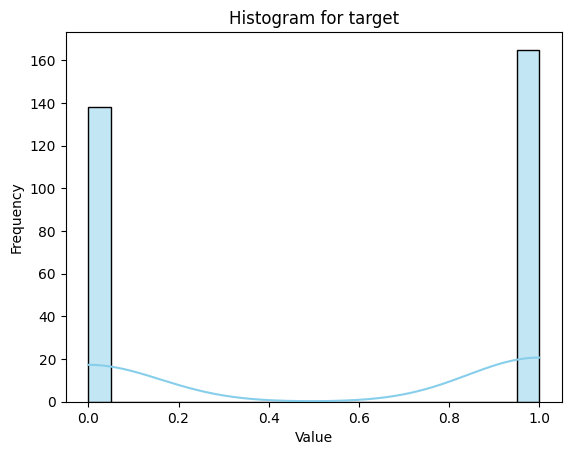

In [58]:
for column in data.columns:
    sns.histplot(data=data, x=column, bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

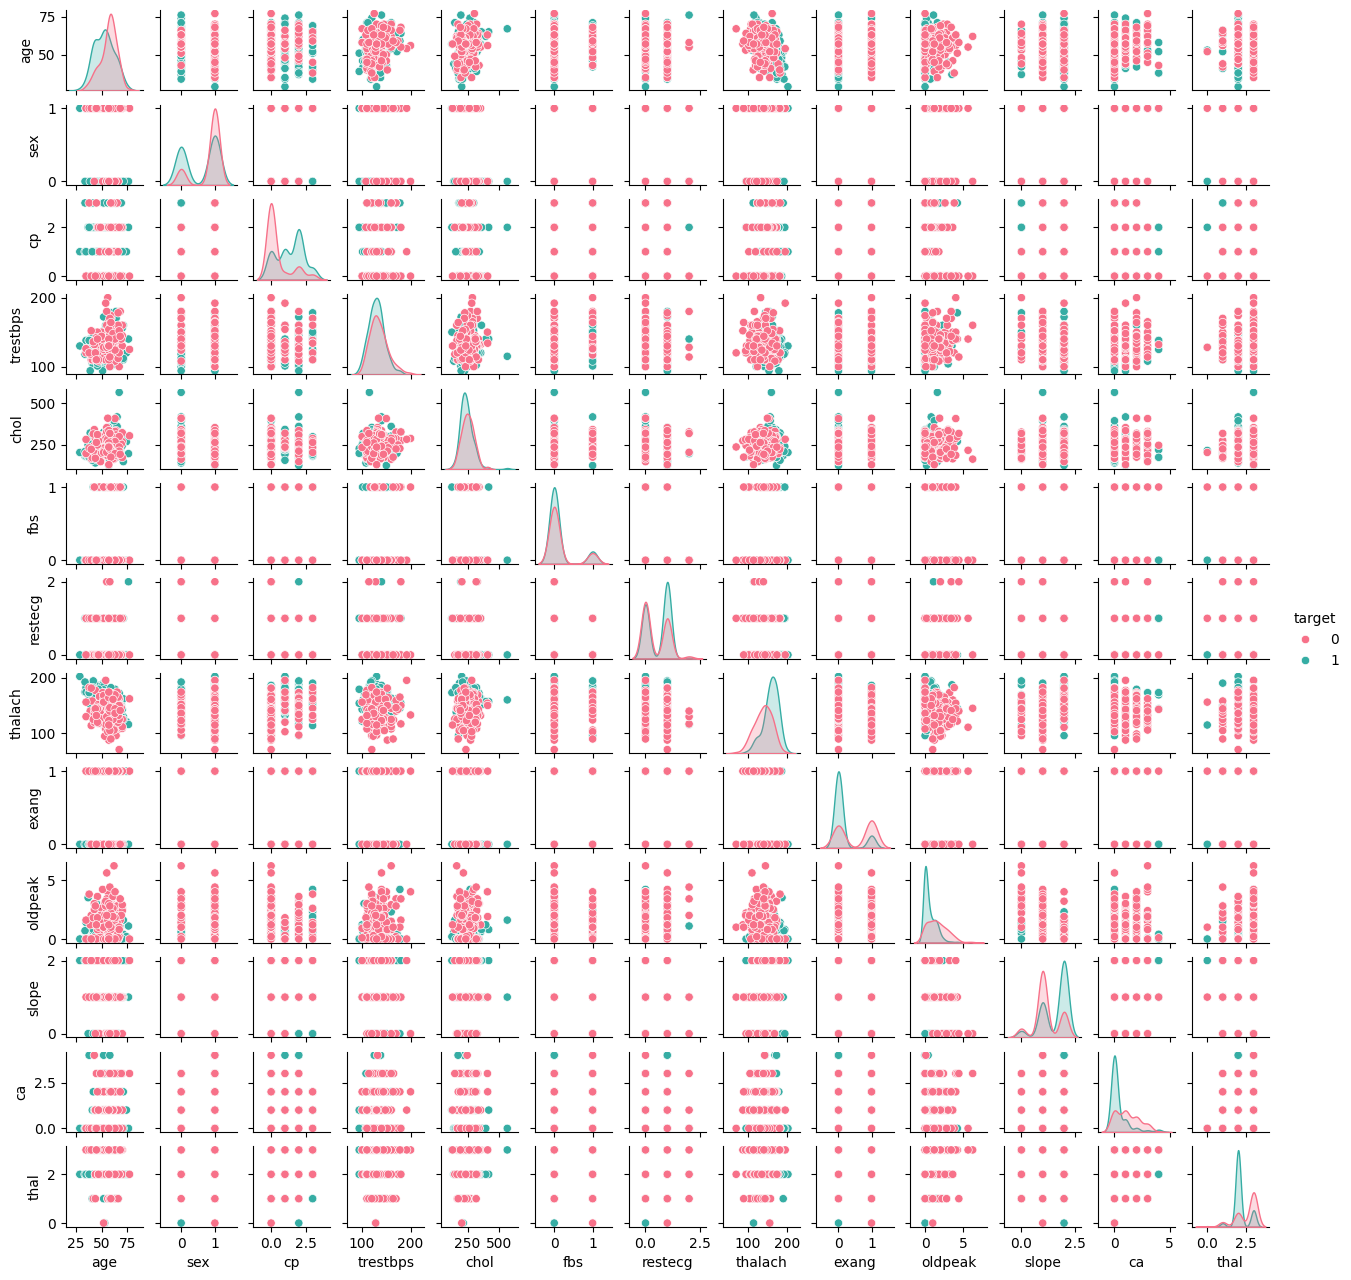

In [37]:
sns.pairplot(data, hue='target', palette='husl', height=1)
plt.show()

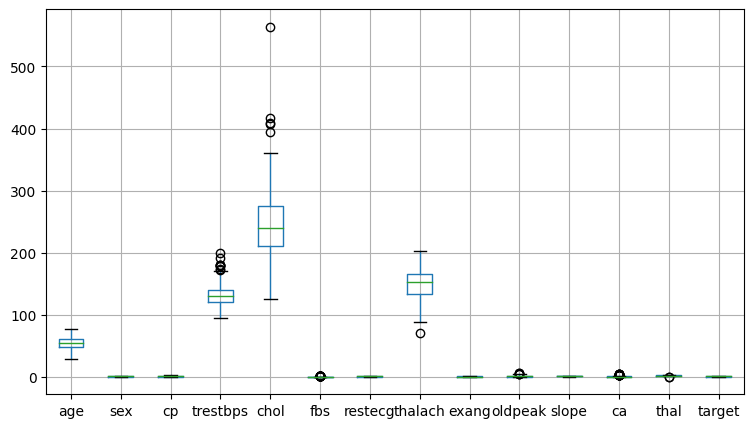

In [38]:
fig = plt.figure(figsize=(9, 5))
data.boxplot()
plt.show()

<Axes: >

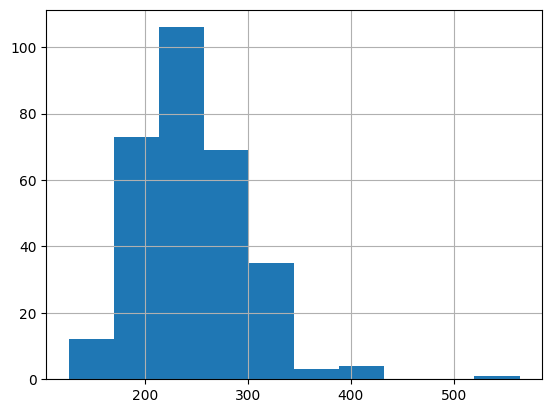

In [39]:
data['chol'].hist()

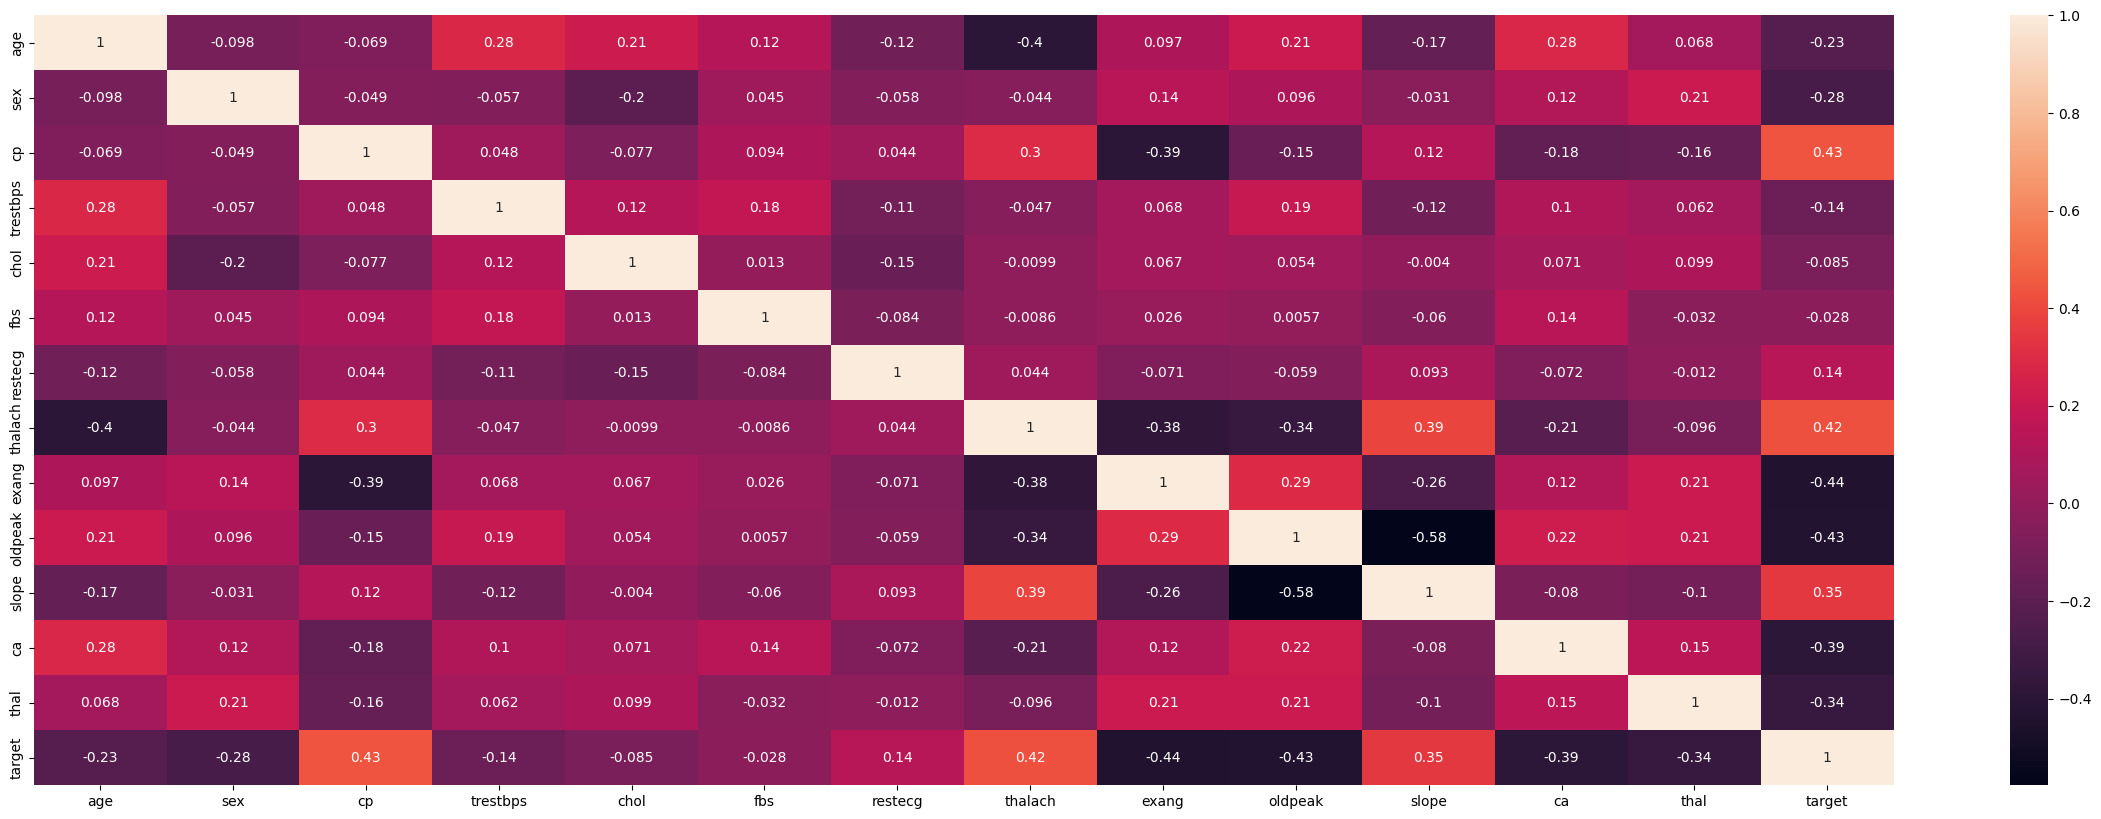

In [40]:
plt.figure(figsize = (30,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

#Dimensionality reduction with PCA

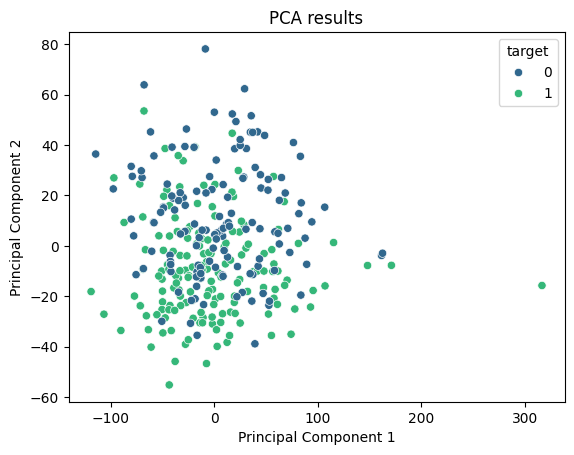

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Classification

#splitting dataset

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

#Data classification on original dataset

In [43]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [44]:
print("Prior probabilities are: ",QDA.priors_)

Prior probabilities are:  [0.45754717 0.54245283]


In [45]:
preds = QDA.predict(X_test)
QDA_accuracy = accuracy_score(y_test, preds)

print("The classification accuracy with QDA method on the original dataset is", round(QDA_accuracy, 3))

The classification accuracy with QDA method on the original dataset is 0.791


In [46]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
LDA_accuracy = accuracy_score(y_test, y_pred)

print("The classification accuracy with LDA method on the original dataset is", round(LDA_accuracy, 3))

The classification accuracy with LDA method on the original dataset is 0.802


In [47]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
GNB_accuracy = accuracy_score(y_test, y_pred)

print("The classification accuracy with GNB method on the original dataset is", round(GNB_accuracy, 3))

The classification accuracy with GNB method on the original dataset is 0.835


#Classification on reduced dataset

In [48]:
QDA_reduced = QuadraticDiscriminantAnalysis()
QDA_reduced.fit(X_reduced_train, y_reduced_train)

preds = QDA_reduced.predict(X_reduced_test)
QDA_reduced_accuracy = accuracy_score(y_reduced_test, preds)

print("The classification accuracy with QDA method on the original dataset is", round(QDA_reduced_accuracy, 3))

The classification accuracy with QDA method on the original dataset is 0.725


In [49]:
LDA_reduced = LinearDiscriminantAnalysis()
LDA_reduced.fit(X_reduced_train, y_reduced_train)
preds = LDA_reduced.predict(X_reduced_test)
LDA_reduced_accuracy = accuracy_score(y_reduced_test, preds)

print("The classification accuracy with LDA method on the original dataset is", round(LDA_reduced_accuracy, 3))

The classification accuracy with LDA method on the original dataset is 0.758


In [50]:
GNB_reduced = GaussianNB()
GNB_reduced.fit(X_reduced_train, y_reduced_train)
y_pred = GNB_reduced.predict(X_reduced_test)
GNB_reduced_accuracy = accuracy_score(y_reduced_test, y_pred)

print("The classification accuracy with GNB method on the original dataset is", round(GNB_reduced_accuracy, 3))

The classification accuracy with GNB method on the original dataset is 0.725
